> ### Logistic regression from scratch (_version 0.1_)
> Creating a simple logistic regression classifier from scratch

In [11]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating the logistic regression classifier

In [12]:
# Returns the score of a particular set of features given the classifier's weights and bias
def score(weights:list, features:list, bias:float) -> float: 
    return np.dot(weights, features) + bias

# Returns the sigmoid evaluation of any float
def sigmoid(x:float) -> float: 
    return 1/(1+np.exp(-x))

# Returns the prediction of the classifier by applying the sigmoid function to the score
def prediction(weights:list, features:list, bias:float) -> float:
    return sigmoid(score(weights, features, bias))

# Return the log loss error of a classifier given a data point's true label and features
def log_loss(weights:list, features:list, bias:float, label:int) -> float:
    pred = prediction(weights, features, bias)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

# Returns the mean log loss error of the classifier over the entire dataset
def mean_log_loss(weights:list, bias:float, all_features:list[tuple], all_labels:list[int]) -> float:
    total_log_loss = 0
    for i in range(len(all_features)):
        total_log_loss += log_loss(weights, all_features[i], bias, all_labels[i])
    return total_log_loss/len(all_features)

# Adjust the classifier's weight and bias given a data point's true label and features
def adjust_classifier(weights:list, features:list, bias:float, label:int, learning_rate:float=0.01):
    pred = prediction(weights, features, bias)
    error = label-pred
    new_weights = []
    for i in range(len(weights)):
        w = weights[i] + (error*features[i]*learning_rate)
        new_weights.append(w)
    new_bias = bias + (error*learning_rate)
    
    return new_weights, new_bias

# Runs the logistic regression algorithm which improves(adjusts) the classifier for the specified number of iterations(epochs)
def logistic_regression_algorithm(all_features:list[tuple], all_labels:list[int], epochs:int=500, learning_rate:float=0.01)  -> tuple:
    weights = [1 for x in range(len(all_features[0]))]
    bias = 0
    all_errors = []
    
    for epoch in range(epochs):
        current_error = mean_log_loss(weights, bias, all_features, all_labels)
        all_errors.append(current_error)
        i = np.random.randint(0, len(all_features))
        weights, bias = adjust_classifier(weights, all_features[i], bias, all_labels[i], learning_rate=learning_rate)
        
    return weights, bias, all_errors

# Provides x and y coordinates for plotting the classifier
def plot_points(weights:list, bias:float, x_range:tuple) -> tuple:
    x_coords = list(range(x_range[0], x_range[1]+1))
    y_coords = [ -((x*weights[0] + bias)/weights[1]) for x in x_coords]
    return x_coords, y_coords

#### Generating the testing dataset

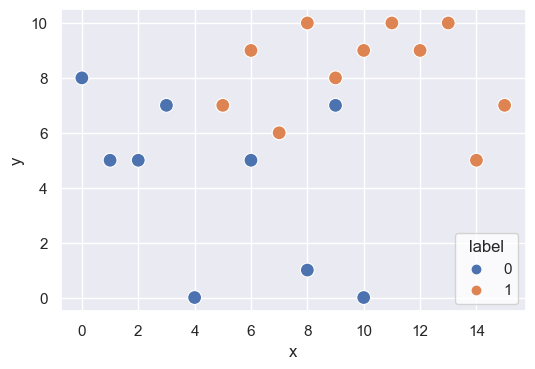

In [13]:
# Generating random values for the testing dataset
np.random.seed(15) # Some good separation seeds: 4,8,15,18,21
xs1 = np.arange(0,11)
ys1 = [np.random.randint(0, len(xs1))  for x in xs1]
xs2 = np.arange(5,16)
ys2 = [np.random.randint(5, len(xs2))  for x in xs2]

# Creating a pandas dataframe for the dataset
df1 = pd.DataFrame(data={'x':xs1, 'y':ys1, 'label':[0 for _ in range(len(xs1))]})
df2 = pd.DataFrame(data={'x':xs2, 'y':ys2, 'label':[1 for _ in range(len(xs1))]})
df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Plotting the dataset
sns.set(style='darkgrid')
plt.figure(figsize=(6,4), dpi=100)
s_plot = sns.scatterplot(data=df, x='x', y='y', hue='label', s=100)
plt.legend(loc='lower right', title='label', facecolor='white')
plt.show()

In [14]:
# Extracting the features and labels from the dataset
ALL_FEATURES = list(zip(df['x'], df['y']))
ALL_LABELS = list(df['label'])

#### Running the logistic regression algorithm

In [31]:
# Running the logistic algorithm and extracting the weights, bias and errors
classifier_weights, classifier_bias, all_errors = logistic_regression_algorithm(ALL_FEATURES, ALL_LABELS, epochs=5000, learning_rate=0.02)

#### Plotting the training results

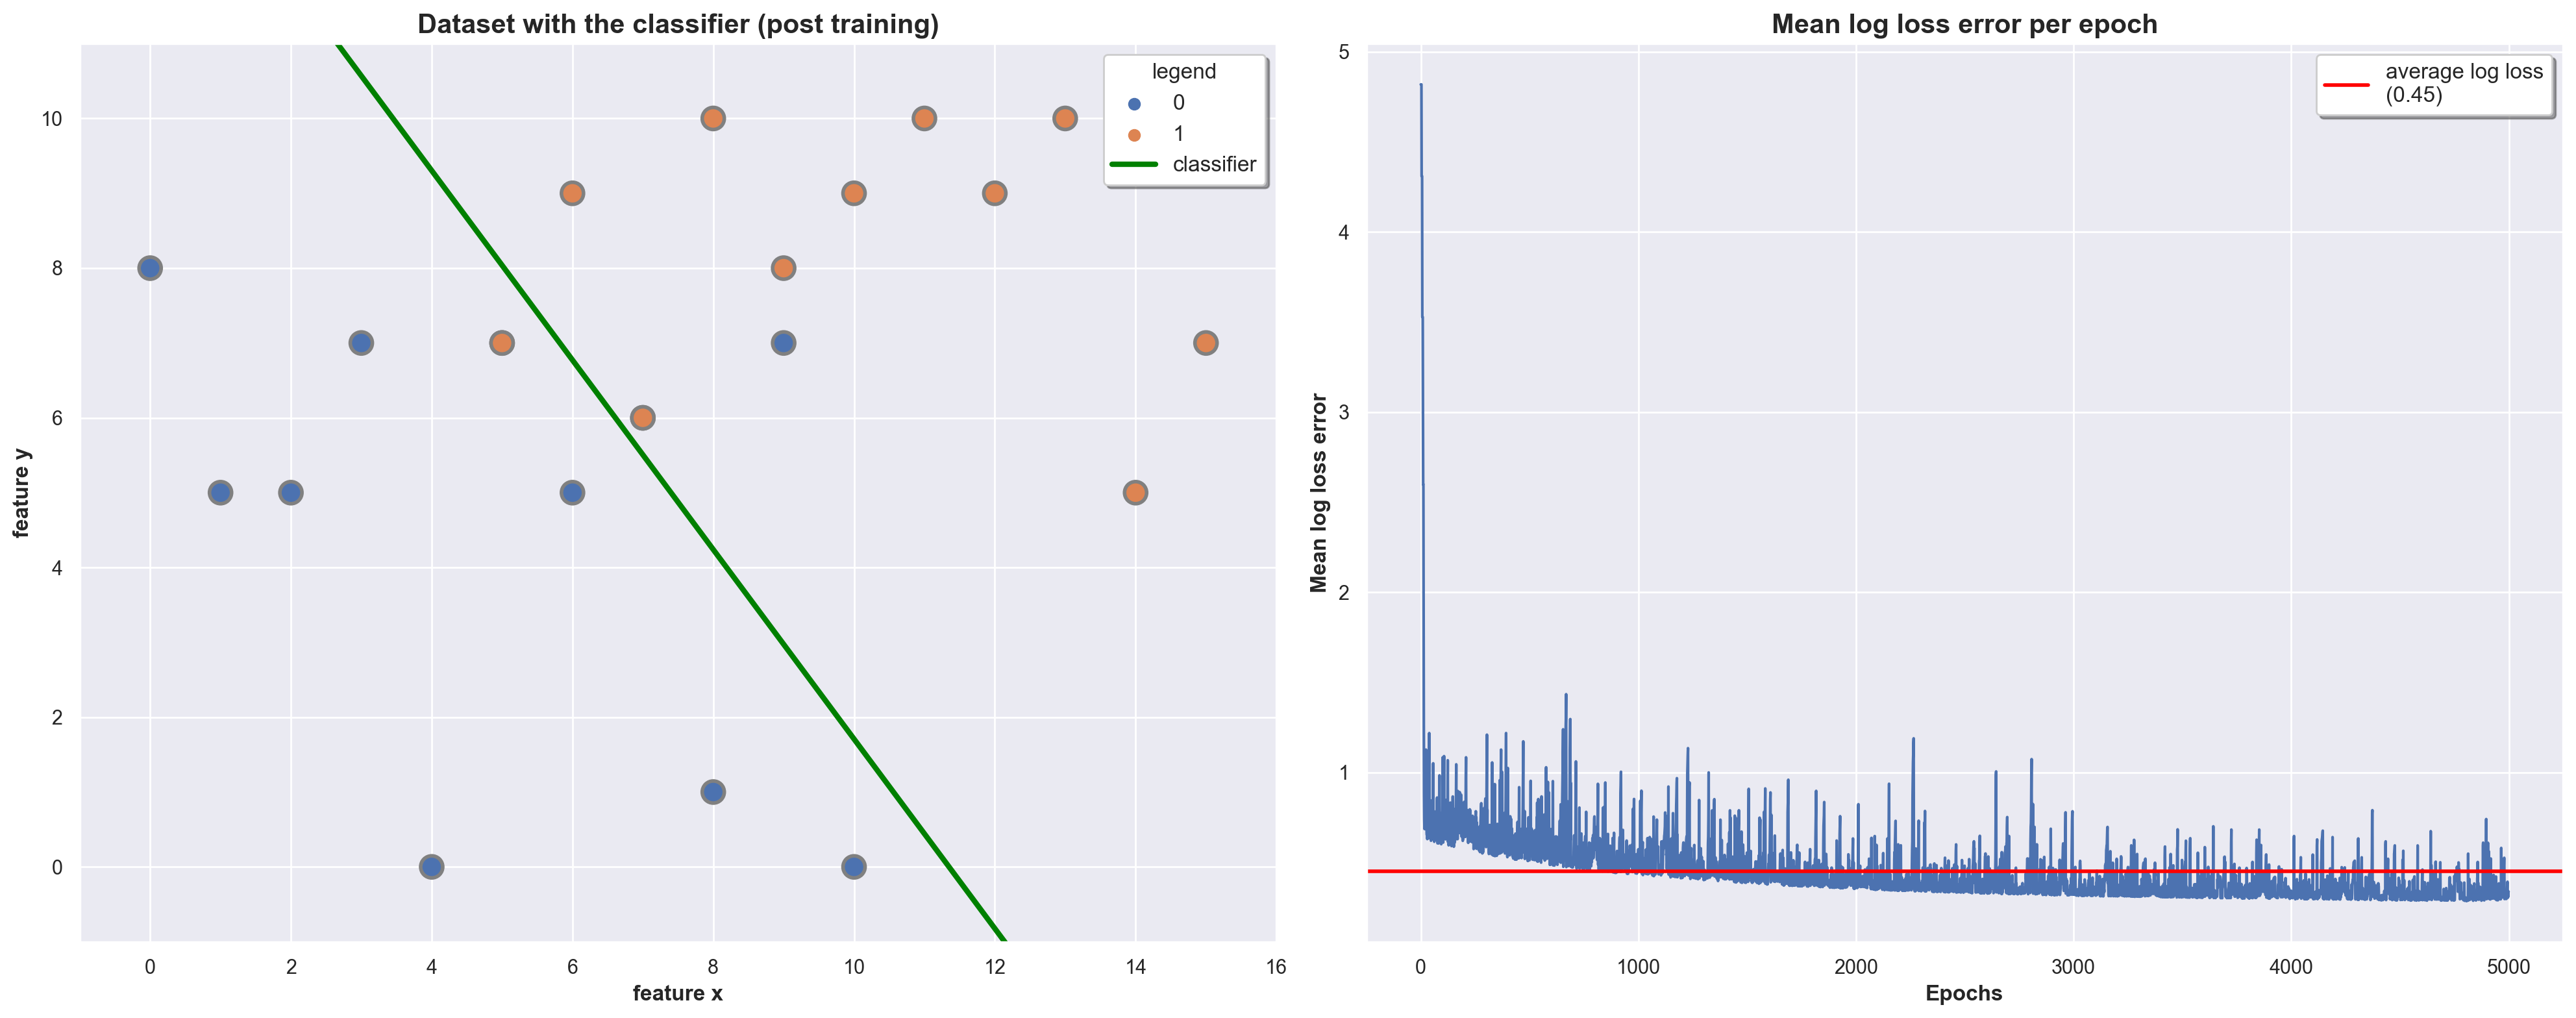

In [32]:
# Plotting the dataset and the classifier
fig, axs = plt.subplots(1,2, figsize=(20,8), dpi=200)
sns.set(style='darkgrid')
s_plot = sns.scatterplot(data=df, x='x', y='y', hue='label', s=150, ax=axs[0], edgecolor='gray', linewidth=2)
xs,ys = plot_points(weights=classifier_weights, bias=classifier_bias, x_range=(df['x'].min()-1,df['x'].max()+1))
s_plot.plot(xs, ys, label='classifier', color='green', lw=3)

s_plot.set_xlim(df['x'].min()-1, df['x'].max()+1)
s_plot.set_ylim(df['y'].min()-1, df['y'].max()+1)
s_plot.set_title("Dataset with the classifier (post training)", fontsize=15, fontweight='bold')
s_plot.set_xlabel("feature x", fontweight='bold')
s_plot.set_ylabel("feature y", fontweight='bold')
s_plot.legend(loc='best', title='legend', facecolor='white', shadow=True, fontsize=12)

# Plotting the errors per epoch
axs[1].plot(all_errors)

axs[1].set_title("Mean log loss error per epoch", fontsize=15, fontweight='bold')
axs[1].set_xlabel("Epochs", fontweight='bold')
axs[1].set_ylabel("Mean log loss error", fontweight="bold")
axs[1].axhline(y=np.mean(all_errors), color='red', linewidth=2, label=f'average log loss\n({np.round(np.mean(all_errors),2)})')
axs[1].legend(facecolor='white', shadow=True, fontsize=12)

plt.tight_layout()